# Extract Frames From Input Videos
Script for transforming videos into images

In [11]:
import cv2
from pathlib import Path
import matplotlib.pyplot as plt

In [12]:
def extract_frames(video_path: str, output_dir: str, fps: float = 0.5):
    """
    Extract frames from a single video at the given rate (frames per second).
    """
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"  [ERROR] Could not open {video_path}")
        return 0

    video_fps = cap.get(cv2.CAP_PROP_FPS)
    if video_fps == 0:
        print(f"  [WARN] Could not read FPS for {video_path}, skipping.")
        cap.release()
        return 0

    # How many video frames to skip between samples
    frame_interval = int(video_fps / fps)

    # saves frames into subfolder, named after video
    video_name = Path(video_path).stem
    save_dir = Path(output_dir) / video_name
    save_dir.mkdir(parents=True, exist_ok=True)

    frame_idx = 0
    saved = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        if frame_idx % frame_interval == 0:
            filename = save_dir / f"frame_{frame_idx:06d}.jpg"
            cv2.imwrite(str(filename), frame)
            saved += 1
        frame_idx += 1

    cap.release()
    print(f"  Saved {saved} frames from {Path(video_path).name} → {save_dir}")
    return saved

## Set directories

In [13]:
video_dir = "../data/videos/KTNES_8Aug_tree1"
output_dir = "../data/frames"
fps = 0.5

In [14]:
video_paths = sorted([p for p in Path(video_dir).rglob("*") if p.suffix == ".AVI"])

print(f"Found {len(video_paths)} videos:")
for vp in video_paths:
    print(f"  {vp.name}")

Found 16 videos:
  KTNES_8Aug_tree1_0002.AVI
  KTNES_8Aug_tree1_0003.AVI
  KTNES_8Aug_tree1_0004.AVI
  KTNES_8Aug_tree1_0005.AVI
  KTNES_8Aug_tree1_0007.AVI
  KTNES_8Aug_tree1_0008.AVI
  KTNES_8Aug_tree1_0009.AVI
  KTNES_8Aug_tree1_0010.AVI
  KTNES_8Aug_tree1_0011.AVI
  KTNES_8Aug_tree1_0012.AVI
  KTNES_8Aug_tree1_0013.AVI
  KTNES_8Aug_tree1_0014.AVI
  KTNES_8Aug_tree1_0016.AVI
  KTNES_8Aug_tree1_0017.AVI
  KTNES_8Aug_tree1_0018.AVI
  KTNES_8Aug_tree1_0019.AVI


## Run Frame Extraction

In [15]:
total_frames = 0

for vp in video_paths:
    print(f"Processing: {vp.name}")
    n = extract_frames(vp, output_dir, fps)
    print(f"  → saved {n} frames")
    total_frames += n

print(f"\nDone! Total frames saved: {total_frames}")
print(f"Frames saved to: {output_dir}")

Processing: KTNES_8Aug_tree1_0002.AVI
  Saved 5 frames from KTNES_8Aug_tree1_0002.AVI → ../data/frames/KTNES_8Aug_tree1_0002
  → saved 5 frames
Processing: KTNES_8Aug_tree1_0003.AVI
  Saved 5 frames from KTNES_8Aug_tree1_0003.AVI → ../data/frames/KTNES_8Aug_tree1_0003
  → saved 5 frames
Processing: KTNES_8Aug_tree1_0004.AVI
  Saved 5 frames from KTNES_8Aug_tree1_0004.AVI → ../data/frames/KTNES_8Aug_tree1_0004
  → saved 5 frames
Processing: KTNES_8Aug_tree1_0005.AVI
  Saved 5 frames from KTNES_8Aug_tree1_0005.AVI → ../data/frames/KTNES_8Aug_tree1_0005
  → saved 5 frames
Processing: KTNES_8Aug_tree1_0007.AVI
  Saved 5 frames from KTNES_8Aug_tree1_0007.AVI → ../data/frames/KTNES_8Aug_tree1_0007
  → saved 5 frames
Processing: KTNES_8Aug_tree1_0008.AVI
  Saved 5 frames from KTNES_8Aug_tree1_0008.AVI → ../data/frames/KTNES_8Aug_tree1_0008
  → saved 5 frames
Processing: KTNES_8Aug_tree1_0009.AVI
  Saved 5 frames from KTNES_8Aug_tree1_0009.AVI → ../data/frames/KTNES_8Aug_tree1_0009
  → saved 5

## Sanity Check
Displaying an image

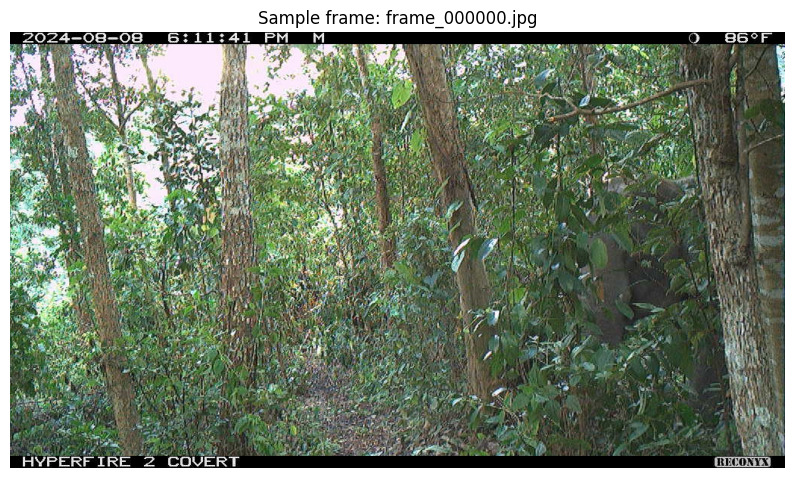

In [16]:
# Grab the first frame from the first video
sample_frames = sorted(Path(output_dir).rglob("*.jpg"))

if sample_frames:
    img = cv2.imread(str(sample_frames[0]))
    img_rgb = cv2.cvtColor(
        img, cv2.COLOR_BGR2RGB
    )  # cv2 loads as BGR, matplotlib needs RGB

    plt.figure(figsize=(10, 6))
    plt.imshow(img_rgb)
    plt.title(f"Sample frame: {sample_frames[0].name}")
    plt.axis("off")
    plt.show()
else:
    print("No frames found — check that extraction ran successfully.")